In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./stations_day_dataset.csv')
df.head()
df.isnull().sum().sort_values(ascending=False)

NH3                     28310
PM10                    24885
Toluene                 24126
Benzene                 17514
SO2                      9562
O3                       7640
NOx                      3752
CO                       2950
AQI_Bucket               2873
AQI                      2873
NO                       2074
NO2                      1402
location                    0
temperature_2m              0
industry_distance           0
relative_humidity_2m        0
river_distance              0
road_distance               0
longitude                   0
latitude                    0
Unnamed: 0                  0
FullAddress                 0
State                       0
City                        0
StationName                 0
StationId                   0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [3]:
import numpy as np
import pandas as pd

def impute_strategy(df):
    result = []
    for station_id,group in df.groupby('StationId'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count = group[col].isnull().sum()
            null_pct = null_count / row_count
            if null_count == row_count:
                skew = np.nan
            else:
                skew = group[col].dropna().skew()
            result.append({
                'StationId': station_id,
                'Column': col,
                'Nulls': null_count,
                'TotalRows': row_count,
                'NullPct': null_pct,
                'Skew': skew
            })
    return pd.DataFrame(result)
summary_df = impute_strategy(df)

In [4]:
import pandas as pd
import numpy as np

def impute_values_station_wise(df):
    for station_id,group in df.groupby('StationId'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count_col = group[col].isnull().sum()
            null_pct =  null_count_col/row_count
            
            if null_pct <= 0.5:
                skew_value = group[col].dropna().skew()
                if skew_value > 0.5 or skew_value < -0.5:
                    df.loc[group.index,col] = group[col].fillna(group[col].median())
                else:
                    df.loc[group.index,col] = group[col].fillna(group[col].mean())
impute_values_station_wise(df)
df.isnull().sum().sort_values(ascending=False)

NH3                     26938
PM10                    23576
Toluene                 19290
Benzene                 12471
SO2                      7620
O3                       5629
AQI_Bucket               2873
NOx                      1063
NO                        684
CO                        435
longitude                   0
road_distance               0
river_distance              0
Unnamed: 0                  0
location                    0
industry_distance           0
temperature_2m              0
relative_humidity_2m        0
latitude                    0
AQI                         0
FullAddress                 0
State                       0
City                        0
StationName                 0
StationId                   0
NO2                         0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [5]:
import pandas as pd
import numpy as np

def impute_values_city_wise(df):
    for City,group in df.groupby('City'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count_col = group[col].isnull().sum()
            null_pct =  null_count_col/row_count
            
            if null_pct <= 0.5:
                skew_value = group[col].dropna().skew()
                if skew_value > 0.5 or skew_value < -0.5:
                    df.loc[group.index,col] = group[col].fillna(group[col].median())
                else:
                    df.loc[group.index,col] = group[col].fillna(group[col].mean())
impute_values_city_wise(df)
df.isnull().sum().sort_values(ascending=False)

PM10                    18172
NH3                     12883
Toluene                  7565
AQI_Bucket               2873
Benzene                  2019
NOx                       379
CO                        225
O3                        158
latitude                    0
longitude                   0
Unnamed: 0                  0
road_distance               0
FullAddress                 0
river_distance              0
industry_distance           0
temperature_2m              0
relative_humidity_2m        0
location                    0
AQI                         0
State                       0
City                        0
StationName                 0
StationId                   0
SO2                         0
NO2                         0
NO                          0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [6]:
import pandas as pd
import numpy as np

def impute_values_state_wise(df):
    for state,group in df.groupby('State'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count_col = group[col].isnull().sum()
            null_pct =  null_count_col/row_count
            
            if null_pct <= 0.5:
                skew_value = group[col].dropna().skew()
                if skew_value > 0.5 or skew_value < -0.5:
                    df.loc[group.index,col] = group[col].fillna(group[col].median())
                else:
                    df.loc[group.index,col] = group[col].fillna(group[col].mean())
impute_values_state_wise(df)
df.isnull().sum().sort_values(ascending=False)

PM10                    18172
NH3                     12883
Toluene                  7565
AQI_Bucket               2873
Benzene                  2019
NOx                       379
CO                        225
longitude                   0
location                    0
latitude                    0
Unnamed: 0                  0
road_distance               0
State                       0
river_distance              0
industry_distance           0
temperature_2m              0
relative_humidity_2m        0
FullAddress                 0
AQI                         0
City                        0
StationName                 0
StationId                   0
O3                          0
SO2                         0
NO2                         0
NO                          0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [7]:
## Impute remanining values with rest of median or mean based on skew value

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    skew = df[col].dropna().skew()
    if skew > 0.5 or skew < -0.5:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum().sort_values(ascending=False)
df.to_csv('./stations_cleaned.csv')
df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m'],
      dtype='object')

In [8]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_average_pm = df.groupby(['Month'])['PM2.5'].mean().reset_index()
monthly_average_pm.columns = ['Month', 'Avg_PM2.5']
monthly_average_pm.sort_values(by='Avg_PM2.5', ascending=False)
def get_season(month):
    if month in [10,11,12,1,2]:
        return "Winter"
    if month in [3,4,5]:
        return "Summer"
    if month in [6,7,8,9]:
        return "Rainy"
df['Season'] = df['Month'].apply(get_season)
df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m', 'Month',
       'Season'],
      dtype='object')

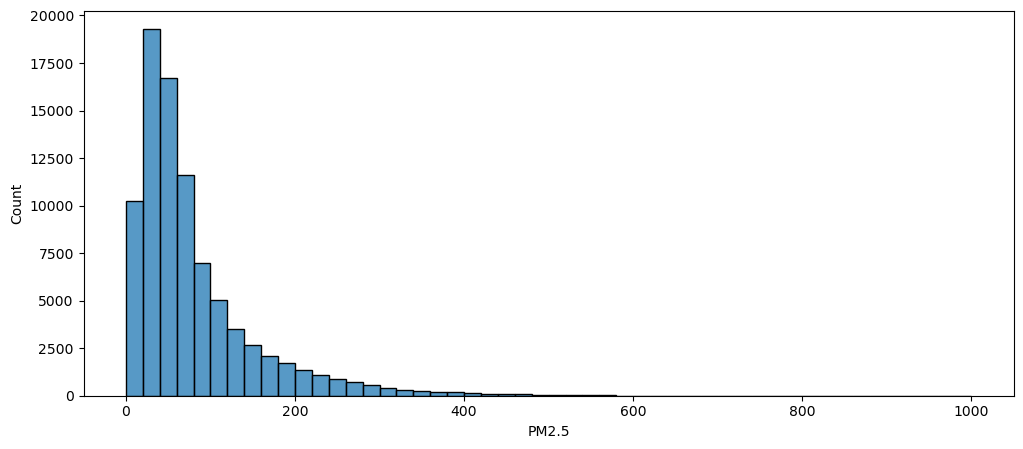

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(data=df,x='PM2.5',bins=50)
plt.show()

    Month       PM2.5
0       1  131.171241
1       2   97.176967
2       3   66.871787
3       4   59.678194
4       5   59.881867
5       6   48.195977
6       7   37.761769
7       8   33.609366
8       9   38.084005
9      10   91.069636
10     11  144.562806
11     12  144.141188


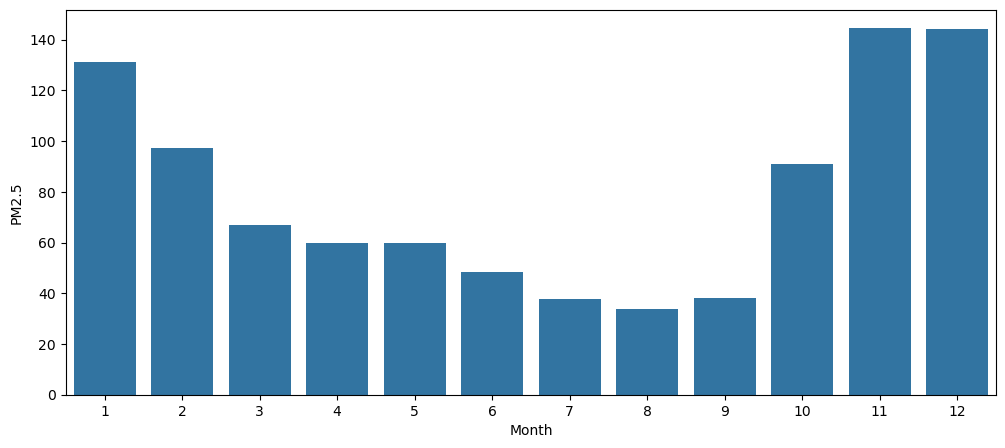

In [23]:
plt.figure(figsize=(12,5))
monthly_avg_pm = df.groupby('Month')['PM2.5'].mean().reset_index()
print(monthly_avg_pm)
sns.barplot(data=monthly_avg_pm,x='Month',y='PM2.5')
plt.show()

   Season       PM2.5
0   Rainy   40.174348
1  Summer   62.183153
2  Winter  121.947414


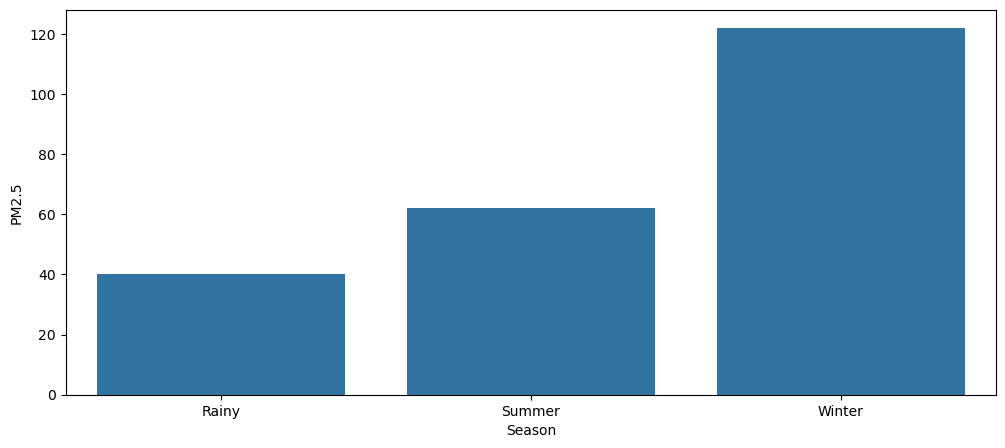

In [25]:
plt.figure(figsize=(12,5))
season_avg_pm = df.groupby('Season')['PM2.5'].mean().reset_index()
print(season_avg_pm)
sns.barplot(data=season_avg_pm,x='Season',y='PM2.5')
plt.show()

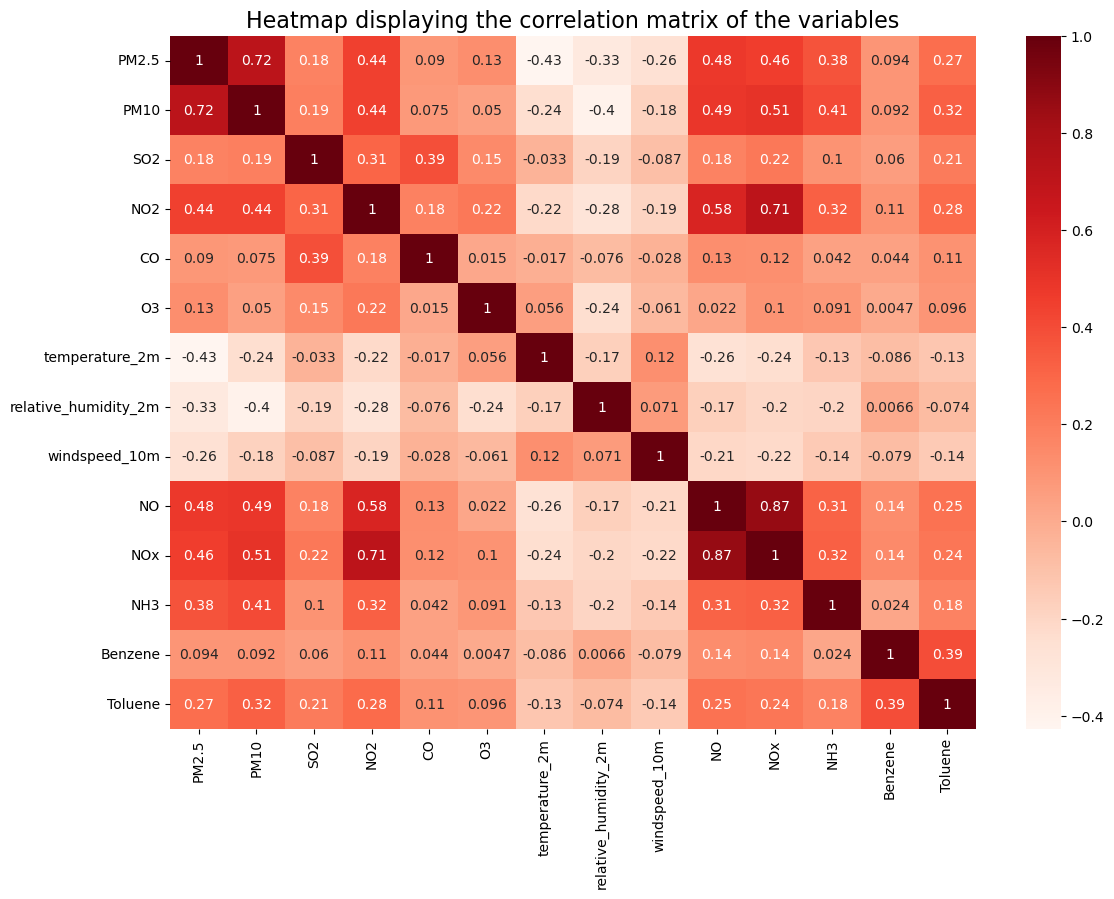

In [28]:
df.columns
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = df[['PM2.5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'temperature_2m', 'relative_humidity_2m',
                         'windspeed_10m', 'NO', 'NOx','NH3','Benzene','Toluene']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [ ]:
df.drop(columns=['AQI','AQI_Bucket','Unnamed: 0','FullAddress','StationName','FullAddress','StationId','location','longitude','latitude','Month','Date','State'],inplace=True,errors='ignore')
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df_encoded = pd.get_dummies(df,columns=['City','Season'],drop_first=True)

In [ ]:
df_encoded.to_csv('./stations_encoded.csv',index=False)
df_encoded